# Investigate the Bloch vectors

The rotation gates are operation on the state vectors $\in \mathbb{C} P^1$. Therefore, it is not obvious what kind of change will appear on the Bloch sphere (in the Euclidean space $\mathbb{R}^3$) when the states are rotated. Let us check this by going back and forth between the two worlds.

In [1]:
import numpy as np

from qiskit.visualization import plot_bloch_vector
%matplotlib inline

## Define basic operators (gates)

In [2]:
I = np.array([
    [1., 0.],
    [0., 1.]
])
X = np.array([
    [0., 1.],
    [1., 0.]
])
Y = np.array([
    [0., -1.j],
    [1.j, 0.]
])
Z = np.array([
    [1., 0.],
    [0., -1.]
])
def Rx(theta):
    return np.cos(theta/2) * I - 1.j * np.sin(theta/2) * X
def Ry(theta):
    return np.cos(theta/2) * I - 1.j * np.sin(theta/2) * Y
def Rz(theta):
    return np.cos(theta/2) * I - 1.j * np.sin(theta/2) * Z

## Define density matrix, converters from state vectors to bloch vectors and vice versa

The density matrix for the pure state $| \psi \rangle$ is determined by $\rho = | \psi \rangle \langle \psi |$. Setting

$$
\begin{align*}
x & = \operatorname{tr}(X \rho) \\
y & = \operatorname{tr}(Y \rho) \\
z & = \operatorname{tr}(Z \rho) \\
\end{align*}
$$

then the relation $\rho = \frac{1}{2}(I + xX + yY + zZ)$ is established and $\vec{r} = (x\ y\ z)^T$ is the representation on the Bloch sphere of the state $| \psi \rangle$. This vecotr is called the Bloch vector.

In [3]:
def density_matrix(state):
    if len(state.shape) == 1:
        state = state.reshape(-1, 1)
    return state * np.conjugate(state.T)

def state2bloch(state):
    rho = density_matrix(state)
    x, y, z = np.trace(X @ rho), np.trace(Y @ rho), np.trace(Z @ rho)
    return np.real(np.array([x, y, z]))

def bloch2state(vec, epsilon = 1e-10):
    x, y, z = np.real(vec)
    cos = np.sqrt((1 + z)/2)
    if z > 1 - epsilon: # theta = 0
        return np.array([1., 0.])
    elif z < -1 + epsilon: # theta = pi
        return np.array([0., 1.])
    else:
        sin = np.sqrt(x**2 + y**2) / (2*cos)
        if x < 0:
            sin = -sin
        if abs(x) < epsilon: # phi = pi/2, 3pi/2
            if y >= 0:
                phi = np.pi/2
            else:
                phi = 3 * np.pi/2
        else:
            phi = np.arctan(y/x)
        return np.array([cos, np.exp(1.j*phi)*sin])

#print(state2bloch(np.array([1., 0.])))
#print(bloch2state(np.array([0., 0., 1.])))

## Some examples of Bloch vectors

Let's display the state vector $| 0 \rangle$ and its rotation around X-axis.

[0. 0. 1.]


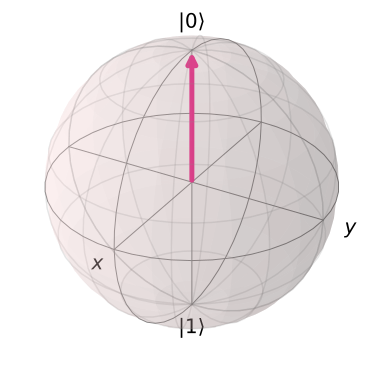

[ 0.         -0.70710678  0.70710678]


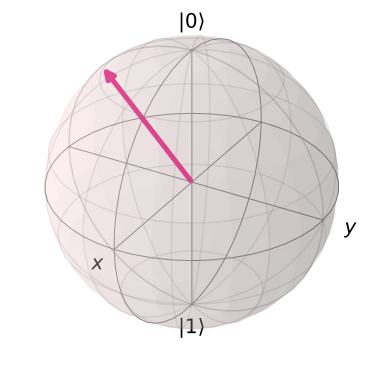

In [4]:
init_vec = np.array([0., 0., 1.])

print(init_vec)
display(plot_bloch_vector(init_vec))
final_vec = state2bloch(Rx(np.pi/4) @ bloch2state(init_vec))
print(final_vec)
display(plot_bloch_vector(final_vec))

## More complicated examples of Bloch vectors

What happens if you rotate a state (Bloch) vector around the Y-axis and then rotate it around the X-axis?

First, let's try the calculation using the APIs defined above.

[ 0.70710678 -0.5         0.5       ]


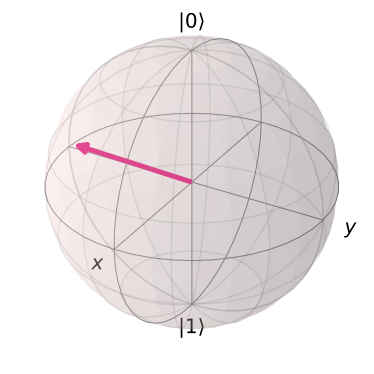

In [5]:
init_state = np.array([1., 0.])
final_state = Rx(np.pi/4) @ Ry(np.pi/4) @ init_state
final_vec = state2bloch(final_state)
print(final_vec)
display(plot_bloch_vector(final_vec))

## Calculate the above example directly in NumPy

There may be some bugs in the APIs, so let's do the calculation using NumPy alone.

In the following, the rotations are not performed as operatros in $\mathbb{C} P^1$, but as rotations in the Euclidean space $\mathbb{R}^3$ where the Bloch sphere is realized. In fact, this computation is justified.

[ 0.70710678 -0.5         0.5       ]


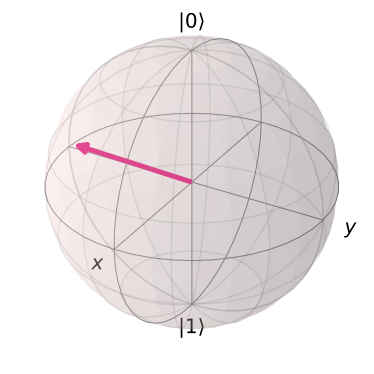

In [6]:
def rot(theta):
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)],
    ])

init_vec = np.array([0., 0., 1.])

vec = init_vec[:]
vec[[2,0]] = rot(np.pi/4)@vec[[2,0]] # rotate only 2:z, 0:x around Y-axis
vec[[1,2]] = rot(np.pi/4)@vec[[1,2]] # rotate only 1:y, 2:z around X-axis
print(vec)
display(plot_bloch_vector(vec))

The apparent same results were obtained.

## Calculating state vectors in a quantum circuit and visualize them

Finally, let's visualize the calculation with Qiskit's API, just to be sure.

First, rotate around Y-axis...


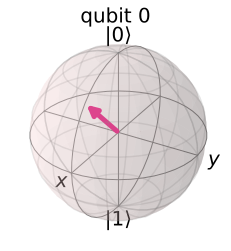

Then, rotate around X-axis.


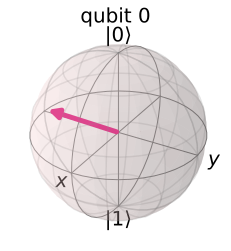

In [7]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(1)
# First, rotate around Y-axis
qc.ry(np.pi/4, 0)
state = Statevector.from_instruction(qc)
print('First, rotate around Y-axis...')
display(plot_bloch_multivector(state))
# Then, rotate around X-axis
qc.rx(np.pi/4, 0)
print('Then, rotate around X-axis.')
state = Statevector.from_instruction(qc)
display(plot_bloch_multivector(state))

All with the same result.